La correlación no es más que una relación matemática que se establece entre 2 variables debido a su propia naturaleza de relación matemática. Además nos permite predecir los valores de salida.

In [1]:
from IPython.display import Image

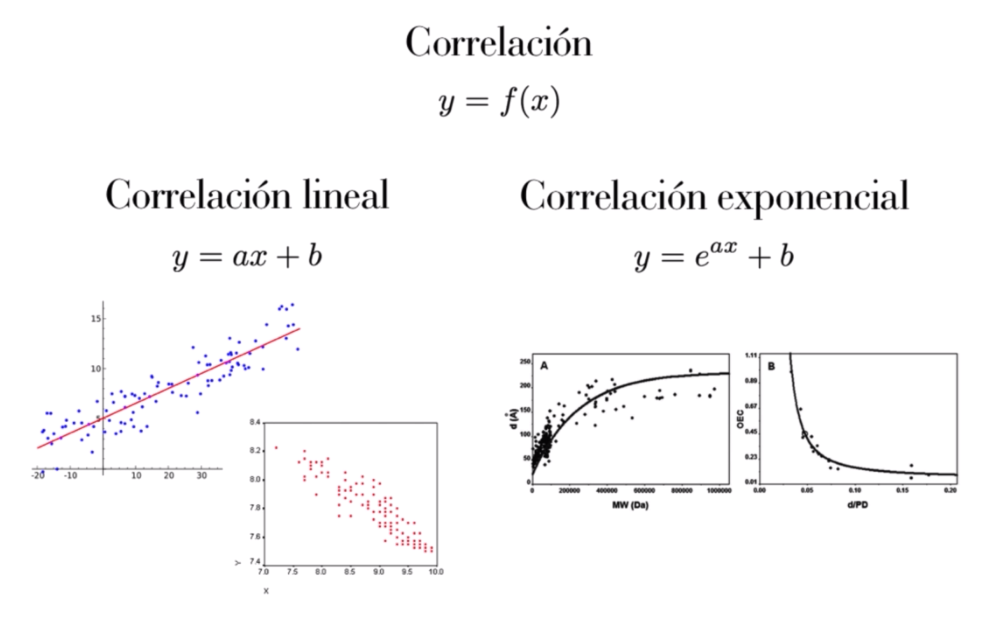

In [2]:
Image(filename="resources/correlacion.png")

## Correlación de Pearson

Para saber si la correlación es positiva o negativa.

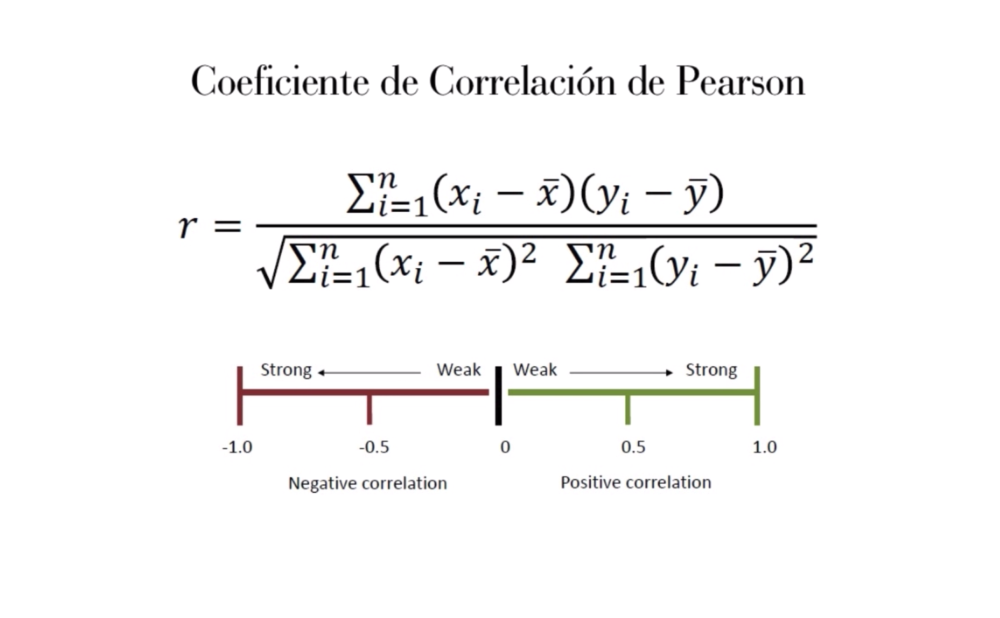

In [3]:
Image(filename="resources/correlacion2.png")

Para saber si la correlación es positiva o negativa. Sólo se tomarán en cuenta aquellos valores superiores a 0.5 o inferiores a -0.5, entonces es cuando hablaremos de una correlación fuerte.

Que exista correlación no implica necesariamente que haya un único factor que explique la causalidad, podría haber varios.

### Ejemplo de correlación

In [4]:
import pandas as pd

In [35]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [6]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
len(data_ads)

200

In [8]:
## Nos interesa saber si hay una correlación entre los gastos en cada media y las ventas obtenidas

In [9]:
import numpy as np

In [10]:
data_ads["corrn_tv"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [11]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn_tv
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [15]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"])) ** 2 # ** 2, es lo mismo que elevar al cuadrado

In [13]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"])) ** 2

In [14]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn_tv,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [16]:
corr_pearson = sum(data_ads["corrn_tv"])/ np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [17]:
corr_pearson

0.782224424861606

El valor de la correlación es positivio y en grado creciente, esto quiere decir que cuanto más se gasta en publicidad en televisión, más aumentan las ventas

In [18]:
## Introducimos en una función los cálculos previos, para poder reutilizarlo
def corr_coef(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1])) ** 2
    df["corr2"] = (df[var2] - np.mean(df[var2])) ** 2
    corr_pearson = sum(df["corrn"])/ np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    
    return corr_pearson

In [19]:
corr_coef(data_ads, "TV", "Sales")

0.782224424861606

In [21]:
cols = data_ads.columns.values

In [22]:
# Con este for vemos la correlación entre todas las columnas del data set
for x in cols:
    for y in cols:
        print(x + ", " + y + " : " + str(corr_coef(data_ads, x, y)))
        
# Todas las variables están correlacionadas al máximo consigo mismas (1)

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


In [23]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Gasto en TV')

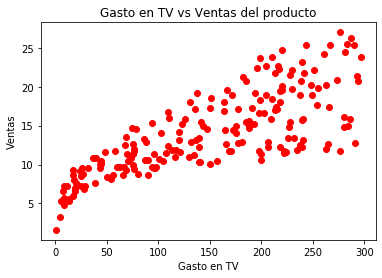

In [26]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
## ro = que se pinte en color rojo y a puntitos
plt.title("Gasto en TV vs Ventas del producto")
plt.ylabel("Ventas")
plt.xlabel("Gasto en TV")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del producto')

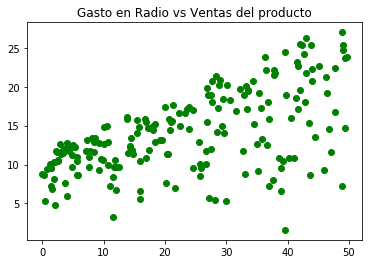

In [33]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
## go = que se pinte en color verde (green) y a puntitos
plt.title("Gasto en Radio vs Ventas del producto")

Text(0.5, 1.0, 'Gasto en Newspaper vs Ventas del producto')

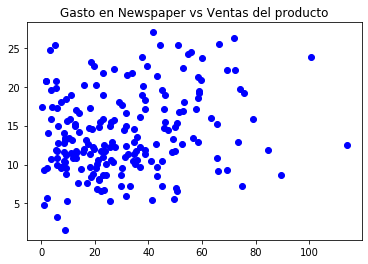

In [41]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
## bo = que se pinte en color azul (blue) y a puntitos
plt.title("Gasto en Newspaper vs Ventas del producto")

Sólo observando los gráficos, podemos ver que visualmente se observan los mismos resultados obtenidos calculando la correlación para cada medio de comunicación.

En el gráfico de la TV, obtenemos un gráfico bastante lineal, apenas hay dispersión de los puntos.
Para la radio, hay algo más de dispersión, pero aún así están bastante agrupados.
Sin embargo, para el periódico, la dispersión de los datos es total.

---------------------------------------

En el ejemplo previo, hemos calculado manualmente la correlación, sin embargo, Python nos permite calcularla directamente.

In [36]:
data_ads.corr() # Devuelve la matriz de correlación, es una matriz simétrica

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


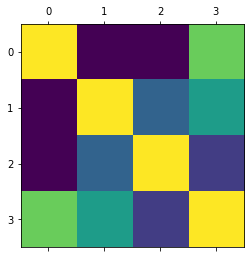

In [37]:
## Vamos a representarla gráficamente
plt.matshow(data_ads.corr())

Correlaciones positivas en amarillo.

Correlaciones más apagadas (azul, malva) son las más bajas.

En este ejemplo, no tenemos ninguna correlación negativa.